In [2]:
from pandas_datareader import data as pdr
from datetime import date
import yfinance as yf
yf.pdr_override()
import pandas as pd
from altair_saver import save



ModuleNotFoundError: No module named 'altair_saver'

In [5]:
import altair as alt

In [6]:

# data = pdr.get_data_yahoo("SPY", start="2017-01-01", end="2017-04-30")
# print(data.info())
# Tickers list
# We can add and delete any ticker from the list to get desired ticker live data
# ticker_list=['^DJI', 'DOW', 'LB', 'EXPE', 'PXD', 'MCHP', 'CRM', 'JEC' , 'NRG', 'HFC', 'NOW']
ticker_list=["DOW","CRM"]

today = date.today()

# We can get data by our choice by giving days bracket
start_date= "2017-01-01"
end_date="2019-12-31"
files=[]



[*********************100%***********************]  1 of 1 completed
                 Open       High        Low      Close  Adj Close   Volume
Date                                                                      
2019-03-20  52.750000  53.500000  49.500000  49.799999  42.869854  2350800
2019-03-21  49.990002  50.000000  48.200001  48.980000  42.163967  1764700
2019-03-22  48.799999  49.950001  48.160000  48.599998  41.836853   844700
2019-03-25  48.599998  49.400002  48.000000  49.150002  42.310314   440900
2019-03-26  49.000000  49.750000  48.180000  48.849998  42.052059   504700
...               ...        ...        ...        ...        ...      ...
2022-01-31  59.500000  60.049999  58.279999  59.730000  59.730000  8056100
2022-02-01  59.799999  61.990002  59.700001  61.810001  61.810001  6659400
2022-02-02  61.709999  62.490002  61.119999  61.660000  61.660000  5463400
2022-02-03  61.500000  62.445000  61.154999  61.209999  61.209999  5363800
2022-02-04  61.200001  61.72000

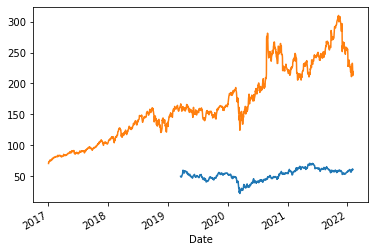

In [10]:

# Create a data folder in your current dir.
def SaveData(df, filename):
    df.to_csv('./data/'+filename+'.csv')

def SaveImage(chart,ticker):
    chart.save('./data/'+ticker+'.png')

def getData(ticker):

    data = pdr.get_data_yahoo(ticker, start=start_date, end=today)


    dataname= ticker+'_'+str(today)
    files.append(dataname)
    print(data)
    alt.Chart(data).mark_line().encode(
        x=alt.X('Date:T', axis = alt.Axis(title = 'Date'.upper(), format = ("%m"))),
        y='Close'
    )
#     altair_viewer.display(chart)
    s = './data/'+ticker+'.png'
    print (s)
#     chart.save(s)
    # SaveImage(chart,ticker)
    SaveData(data, dataname)


#This loop will iterate over ticker list, will pass one ticker to get data, and save that data as file.
for tik in ticker_list:
    getData(tik)

for i in range(0,1):
    df1= pd.read_csv('./data/'+ str(files[i])+'.csv')
    print (df1.head())

[*********************100%***********************]  1 of 1 completed


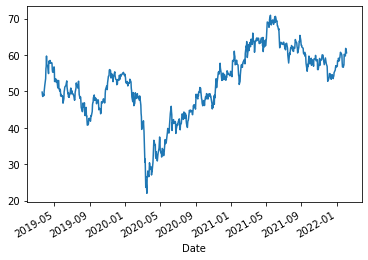

In [12]:
data = pdr.get_data_yahoo("DOW", start=start_date, end=today)
data['Close'].plot()
plt.figure(figsize=(10,10))
plt.plot(df.index, df['close'])
plt.xlabel("date")
plt.ylabel("$ price")
plt.title("DIS Stock Price 1/1/17 - 8/1/19")